In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### [資料來源](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.drop(['population', 'country-year', 'HDI for year', 'generation', 'suicides/100k pop', ' gdp_for_year ($) '], axis=1, inplace=True)

In [5]:
df.head()

,country,year,sex,age,suicides_no,gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,796
1,Albania,1987,male,35-54 years,16,796
2,Albania,1987,female,15-24 years,14,796
3,Albania,1987,male,75+ years,1,796
4,Albania,1987,male,25-34 years,9,796


In [6]:
df = df[(df.year >=2000)]
df.head()

,country,year,sex,age,suicides_no,gdp_per_capita ($)
132,Albania,2000,male,25-34 years,17,1299
133,Albania,2000,male,55-74 years,10,1299
134,Albania,2000,female,75+ years,2,1299
135,Albania,2000,male,75+ years,1,1299
136,Albania,2000,female,15-24 years,6,1299


In [23]:
df.rename(columns={'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,gdp_per_capita
132,Albania,2000,male,25-34 years,17,1299
133,Albania,2000,male,55-74 years,10,1299
134,Albania,2000,female,75+ years,2,1299
135,Albania,2000,male,75+ years,1,1299
136,Albania,2000,female,15-24 years,6,1299


### 性別比較

In [25]:
df_sex = df.groupby(['sex']).sum()
df_sex.drop(['year', 'gdp_per_capita '], axis=1, inplace= True)
df_sex

,suicides_no
sex,
female,854568
male,2955801


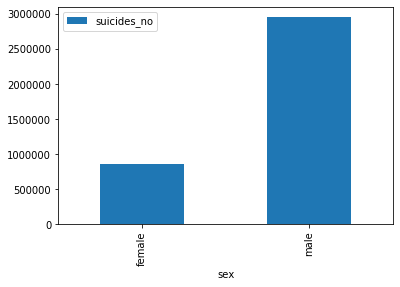

In [48]:
df_sex.plot.bar();

### 年份趨勢

In [18]:
df_year = df.groupby(['year']).sum()
df_year.drop([ 'gdp_per_capita '], axis=1, inplace= True)
df_year.head()

,suicides_no
year,
2000,255832
2001,250652
2002,256095
2003,256079
2004,240861


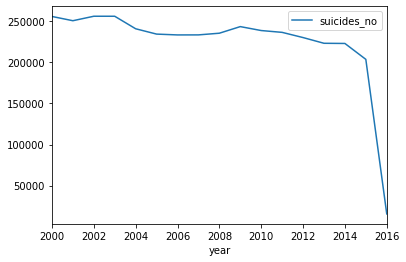

In [19]:
df_year.plot()

### 自殺率與人均GDP關聯

In [20]:
df_gdp = df.groupby(['gdp_per_capita ']).sum()
df_gdp.drop([ 'year'], axis=1, inplace= True)
df_gdp.head()

,suicides_no
gdp_per_capita,
313,510
345,560
359,567
424,479
428,1576


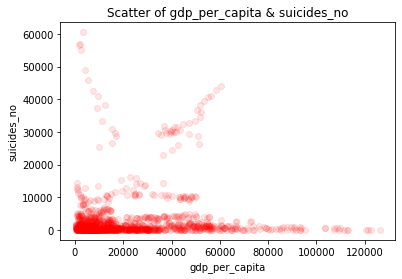

In [59]:
df_gdp_1 = df_gdp.index
df_gdp_1 = df_gdp_1.to_numpy()
df_gdp_2 = df_gdp.suicides_no
df_gdp_2 = df_gdp_2.to_numpy()

plt.scatter(df_gdp_1, df_gdp.suicides_no, c='r', alpha=0.1)
plt.title('Scatter of gdp_per_capita & suicides_no')
plt.xlabel('gdp_per_capita')
plt.ylabel('suicides_no')
plt.show();